In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


from data.processed_capacity_factors.get_cap_factor import get_pv_and_wind                #Funktion benötigt regions aus regions, excluder_solar, excluder_wind
from data.processed_load_profile.load_processing import get_regional_load
from data.processed_existing_conv_pp.get_existing_conv_pp import get_existing_conv_pp
from data.processed_RE_potential.get_RE_potential import get_RE_potential
from data.processed_spatial_res.get_spatial_res import get_spatial_res


In [2]:
# Input Data Spatial Resolution
regions= get_spatial_res()
regions.head()

,geometry,GID_0,COUNTRY,NAME_1,REP_POINT
region_5,,,,,
Kärnten/Steiermark,"POLYGON ((14.43537 46.44343, 14.43537 46.44345...",AUT,Austria,Kärnten,POINT (14.98609 47.10053)
Niederösterreich/Burgenland,"POLYGON ((16.06715 46.84889, 16.0672 46.84884,...",AUT,Austria,Burgenland,POINT (15.92138 47.92607)
Oberösterreich/Salzburg,"POLYGON ((13.69947 47.00479, 13.69858 47.00534...",AUT,Austria,Oberösterreich,POINT (13.86111 47.85873)
Tirol/Vorarlberg,"MULTIPOLYGON (((12.39612 46.71143, 12.39598 46...",AUT,Austria,Tirol,POINT (10.82959 47.25349)
Wien,"POLYGON ((16.29905 48.12999, 16.29897 48.12999...",AUT,Austria,Wien,POINT (16.37248 48.2208)


In [ ]:
# Input Data Load Zeitreihe

load_regions = get_regional_load()
load_regions.head()

/opt/anaconda3/envs/esm-ws-25-26/lib/python3.13/site-packages/atlite/gis.py:480: RasterioDeprecationWarning: is_valid is not useful and will be removed in 2.0.0.
  if not raster.crs.is_valid if raster.crs is not None else True:
/opt/anaconda3/envs/esm-ws-25-26/lib/python3.13/site-packages/atlite/gis.py:480: RasterioDeprecationWarning: is_valid is not useful and will be removed in 2.0.0.
  if not raster.crs.is_valid if raster.crs is not None else True:


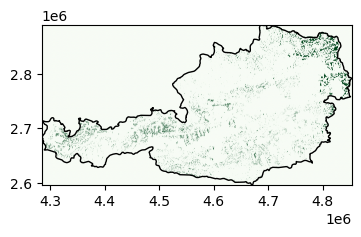

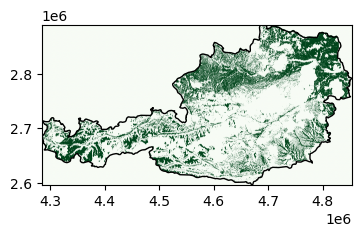

In [3]:
# Input RE Potential 

excluder_wind, excluder_solar, shape = get_RE_potential()

In [4]:
# Input Capacity factors 

pv_cap, pv_cf, wind_cap, wind_cf = get_pv_and_wind(regions, excluder_solar, excluder_wind)

'''#Capacity 
pv_cf_df   = pv_cf.to_pandas()
wind_cf_df = wind_cf.to_pandas()
pv_cap_s   = pv_cap.to_pandas()
wind_cap_s = wind_cap.to_pandas()'''

/opt/anaconda3/envs/esm-ws-25-26/lib/python3.13/site-packages/atlite/pv/solar_position.py:71: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  time_shift = pd.to_timedelta(time_shift)


KeyError: "No variable named 'influx_toa'. Variables on the dataset include ['x', 'y', 'time', 'lon', 'lat']"